# Coffee Shop Sales Analysis

**5 key objectives** :

1. **Identify Top-selling Products by Revenue and Quantity**:
   - Objective: Determine which products and categories (e.g., Coffee, Tea) generate the highest revenue and total sales volume across all stores.

2. **Analyze Store Performance**:
   - Objective: Compare sales performance across store locations to identify high and low-performing stores. Investigate factors driving success in top-performing locations.

3. **Perform BCG Analysis for Product Types**:
   - Objective: Classify products into **Stars, Cash Cows, Dogs, and Question Marks** based on their market growth and sales share to guide strategic decision-making on product focus.

4. **Identify Peak Sales Times and Days**:
   - Objective: Analyze sales patterns by day of the week and time of day to understand when stores experience the highest traffic. This can help optimize staffing and inventory levels.

5. **Explore the Impact of Product Size on Sales**:
   - Objective: Evaluate whether product size (e.g., small, regular, large) influences sales performance. Investigate if larger sizes drive more revenue or if customers prefer smaller sizes for certain product types.

## Import Library and Data

In [92]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import re
import warnings

In [56]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_excel('C:/Users/user/OneDrive/Documents/GitHub/Data-Analysis-Portfolio/coffee-shop-sales/Coffee Shop Sales.xlsx')
# df = pd.read_excel('C:/Users/Eugene/Documents/GitHub/Data-Analysis-Portfolio/coffee-shop-sales/Coffee Shop Sales.xlsx')

## Initial Exploration

In [3]:
df.sample(10)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
52810,52917,2023-03-28,14:54:58,2,8,Hell's Kitchen,27,3.50,Coffee,Organic brewed coffee,Brazilian Lg
27203,27260,2023-02-18,07:41:37,2,8,Hell's Kitchen,61,4.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Lg
57140,57251,2023-04-03,16:43:58,1,5,Lower Manhattan,71,3.75,Bakery,Pastry,Chocolate Croissant
146,147,2023-01-01,11:49:42,1,8,Hell's Kitchen,72,3.25,Bakery,Scone,Ginger Scone
17033,17063,2023-01-31,09:38:56,1,3,Astoria,3,14.75,Coffee beans,Espresso Beans,Espresso Roast
84123,84297,2023-05-04,16:24:48,2,3,Astoria,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
2801,2802,2023-01-06,08:47:36,2,8,Hell's Kitchen,34,2.45,Coffee,Premium brewed coffee,Jamaican Coffee River Sm
29178,29235,2023-02-21,09:13:27,2,5,Lower Manhattan,55,4.00,Tea,Brewed Chai tea,Morning Sunrise Chai Lg
114279,114541,2023-06-01,13:42:49,1,5,Lower Manhattan,36,3.75,Coffee,Premium brewed coffee,Jamaican Coffee River Lg
70133,70303,2023-04-18,19:35:33,1,3,Astoria,71,3.75,Bakery,Pastry,Chocolate Croissant


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [5]:
df.shape

(149116, 11)

In [6]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [7]:
df.duplicated().any()

False

In [8]:
df.nunique().reset_index()

,index,0
0,transaction_id,149116
1,transaction_date,181
2,transaction_time,25762
3,transaction_qty,6
4,store_id,3
5,store_location,3
6,product_id,80
7,unit_price,41
8,product_category,9
9,product_type,29


In [9]:
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [10]:
df.describe(include= object)

,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116
unique,25762,3,9,29,80
top,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,41,50735,58416,17183,3076


## Preprocessing

### Handle Data Type

In [11]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.time

### Enhance Data Quality

Extract hour from transaction_time with specified format into hourly based.

In [12]:
df['transaction_hour'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour

Extract the size and name from the column `product_detail`.

In [15]:
# Define a function to extract the product size and product name
def extract_product_info(product_detail):
    # Define patterns for size and format
    size_pattern = r'(Rg|Lg|Sm|shot|syrup)$'
    
    # Match size
    size_match = re.search(size_pattern, product_detail)
    
    if size_match:
        # Map size abbreviations to full names
        size_map = {'Rg': 'regular', 'Lg': 'large', 'Sm': 'small', 'shot': 'shot', 'syrup': 'syrup'}
        product_size = size_map.get(size_match.group(), 'unknown')
        
        # Remove size from product name
        product_name = re.sub(size_pattern, '', product_detail).strip()
    else:
        # If no size is found, set size as 'unknown' and product name as original detail
        product_size = 'unknown'
        product_name = product_detail.strip()

    return product_size, product_name

In [16]:
df[['product_size', 'product_name']] = df['product_detail'].apply(lambda x: pd.Series(extract_product_info(x)))

Generate new column name `revenue`, where it contain the calculation value from transaction quantity `transaction_qty` multiply with unit price `unit_price`.

In [17]:
df['revenue'] = df['transaction_qty'] * df['unit_price']

Extract day, month, and month's name from transaction_date to analyze time-based trends.

In [18]:
df['transaction_day'] = df['transaction_date'].dt.day_name()
df['transaction_month'] = df['transaction_date'].dt.month
df['transaction_month_name'] = df['transaction_date'].dt.month_name()

Store the order for Month and Day for the better analysis, visualization, and insights in separate variables.

In [19]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   transaction_id          149116 non-null  int64         
 1   transaction_date        149116 non-null  datetime64[ns]
 2   transaction_time        149116 non-null  object        
 3   transaction_qty         149116 non-null  int64         
 4   store_id                149116 non-null  int64         
 5   store_location          149116 non-null  object        
 6   product_id              149116 non-null  int64         
 7   unit_price              149116 non-null  float64       
 8   product_category        149116 non-null  object        
 9   product_type            149116 non-null  object        
 10  product_detail          149116 non-null  object        
 11  transaction_hour        149116 non-null  int32         
 12  product_size            149116

In [21]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_hour,product_size,product_name,revenue,transaction_day,transaction_month,transaction_month_name
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,7,regular,Ethiopia,6.00,Sunday,1,January
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,7,large,Spicy Eye Opener Chai,6.20,Sunday,1,January
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,7,large,Dark chocolate,9.00,Sunday,1,January
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,7,small,Our Old Time Diner Blend,2.00,Sunday,1,January
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,7,large,Spicy Eye Opener Chai,6.20,Sunday,1,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,20,regular,Peppermint,5.00,Friday,6,June
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,20,large,English Breakfast,6.00,Friday,6,June
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,20,large,Peppermint,3.00,Friday,6,June
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,20,unknown,Cappuccino,3.75,Friday,6,June


## Analysis

### Identify Top-Selling Products Category by Revenue and Quantity

Determine which products and categories (e.g., Coffee, Tea) generate the highest revenue and total sales volume across all stores.

#### Overall Top Item Sold by Revenue and Quantity

In [22]:
# Group by product type and product name to calculate total quantity and revenue
product_sales  = df.groupby(['product_type', 'product_category']).agg({
    'transaction_qty': 'sum',
    'revenue': 'sum'
}).reset_index()

In [23]:
top_products_by_revenue = product_sales.sort_values(by='revenue', ascending=False)
top_products_by_revenue 

,product_type,product_category,transaction_qty,revenue
0,Barista Espresso,Coffee,24943,91406.20
4,Brewed Chai tea,Tea,26250,77081.95
17,Hot chocolate,Drinking Chocolate,17457,72416.00
13,Gourmet brewed coffee,Coffee,25973,70034.60
3,Brewed Black tea,Tea,17462,47932.00
6,Brewed herbal tea,Tea,17328,47539.50
25,Premium brewed coffee,Coffee,12431,38781.15
22,Organic brewed coffee,Coffee,13012,37746.50
27,Scone,Bakery,10465,36866.12
10,Drip coffee,Coffee,12891,31984.00


In [24]:
top_products_by_quantity  = product_sales.sort_values(by='transaction_qty', ascending=False)
top_products_by_quantity

,product_type,product_category,transaction_qty,revenue
4,Brewed Chai tea,Tea,26250,77081.95
13,Gourmet brewed coffee,Coffee,25973,70034.60
0,Barista Espresso,Coffee,24943,91406.20
3,Brewed Black tea,Tea,17462,47932.00
17,Hot chocolate,Drinking Chocolate,17457,72416.00
6,Brewed herbal tea,Tea,17328,47539.50
22,Organic brewed coffee,Coffee,13012,37746.50
10,Drip coffee,Coffee,12891,31984.00
25,Premium brewed coffee,Coffee,12431,38781.15
27,Scone,Bakery,10465,36866.12


#### Top Item Sold by Revenue and Quantity on each Store

In [68]:
# Group by store_location, product type, and product category to calculate total quantity and revenue
store_product_sales = df.groupby(['store_location', 'product_type', 'product_category']).agg({
    'transaction_qty': 'sum',
    'revenue': 'sum'
}).reset_index()

In [73]:
df['store_location'].unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

In [70]:
# Create a dictionary to hold a DataFrame for each store
store_sales_dataframes = {}

# Loop over each unique store and create a DataFrame for each
for store in store_product_sales['store_location'].unique():
    store_sales_dataframes[store] = store_product_sales[store_product_sales['store_location'] == store].reset_index(drop=True)


##### Astoria Store

In [76]:
astoria_product_by_revenue = store_sales_dataframes['Astoria'].sort_values(by = 'revenue', ascending = False)
astoria_product_by_revenue

,store_location,product_type,product_category,transaction_qty,revenue
0,Astoria,Barista Espresso,Coffee,7345,27935.00
4,Astoria,Brewed Chai tea,Tea,9306,27427.90
17,Astoria,Hot chocolate,Drinking Chocolate,6351,26335.25
13,Astoria,Gourmet brewed coffee,Coffee,8938,23823.30
6,Astoria,Brewed herbal tea,Tea,5953,16282.00
3,Astoria,Brewed Black tea,Tea,5891,16141.00
25,Astoria,Premium brewed coffee,Coffee,4451,13946.30
22,Astoria,Organic brewed coffee,Coffee,4344,12623.20
27,Astoria,Scone,Bakery,3289,11629.75
10,Astoria,Drip coffee,Coffee,4577,11416.50


In [75]:
astoria_product_by_quantity = store_sales_dataframes['Astoria'].sort_values(by = 'transaction_qty', ascending = False)
astoria_product_by_quantity

,store_location,product_type,product_category,transaction_qty,revenue
4,Astoria,Brewed Chai tea,Tea,9306,27427.90
13,Astoria,Gourmet brewed coffee,Coffee,8938,23823.30
0,Astoria,Barista Espresso,Coffee,7345,27935.00
17,Astoria,Hot chocolate,Drinking Chocolate,6351,26335.25
6,Astoria,Brewed herbal tea,Tea,5953,16282.00
3,Astoria,Brewed Black tea,Tea,5891,16141.00
10,Astoria,Drip coffee,Coffee,4577,11416.50
25,Astoria,Premium brewed coffee,Coffee,4451,13946.30
22,Astoria,Organic brewed coffee,Coffee,4344,12623.20
27,Astoria,Scone,Bakery,3289,11629.75


##### Hell's Kitchen Store

In [78]:
hk_product_by_revenue = store_sales_dataframes["Hell's Kitchen"].sort_values(by = 'revenue', ascending = False)
hk_product_by_revenue

,store_location,product_type,product_category,transaction_qty,revenue
0,Hell's Kitchen,Barista Espresso,Coffee,9064,32420.20
4,Hell's Kitchen,Brewed Chai tea,Tea,8755,25645.30
17,Hell's Kitchen,Hot chocolate,Drinking Chocolate,5672,23586.25
13,Hell's Kitchen,Gourmet brewed coffee,Coffee,8472,23010.10
3,Hell's Kitchen,Brewed Black tea,Tea,5664,15575.50
6,Hell's Kitchen,Brewed herbal tea,Tea,5555,15263.00
22,Hell's Kitchen,Organic brewed coffee,Coffee,4518,13114.00
27,Hell's Kitchen,Scone,Bakery,3520,12575.70
25,Hell's Kitchen,Premium brewed coffee,Coffee,3824,11927.85
10,Hell's Kitchen,Drip coffee,Coffee,4342,10750.50


In [79]:
hk_product_by_quantity = store_sales_dataframes["Hell's Kitchen"].sort_values(by = 'transaction_qty', ascending = False)
hk_product_by_quantity

,store_location,product_type,product_category,transaction_qty,revenue
0,Hell's Kitchen,Barista Espresso,Coffee,9064,32420.20
4,Hell's Kitchen,Brewed Chai tea,Tea,8755,25645.30
13,Hell's Kitchen,Gourmet brewed coffee,Coffee,8472,23010.10
17,Hell's Kitchen,Hot chocolate,Drinking Chocolate,5672,23586.25
3,Hell's Kitchen,Brewed Black tea,Tea,5664,15575.50
6,Hell's Kitchen,Brewed herbal tea,Tea,5555,15263.00
22,Hell's Kitchen,Organic brewed coffee,Coffee,4518,13114.00
10,Hell's Kitchen,Drip coffee,Coffee,4342,10750.50
25,Hell's Kitchen,Premium brewed coffee,Coffee,3824,11927.85
27,Hell's Kitchen,Scone,Bakery,3520,12575.70


##### Lower Manhattan Store

In [80]:
lm_product_by_revenue = store_sales_dataframes["Lower Manhattan"].sort_values(by = 'revenue', ascending = False)
lm_product_by_revenue

,store_location,product_type,product_category,transaction_qty,revenue
0,Lower Manhattan,Barista Espresso,Coffee,8534,31051.00
4,Lower Manhattan,Brewed Chai tea,Tea,8189,24008.75
13,Lower Manhattan,Gourmet brewed coffee,Coffee,8563,23201.20
17,Lower Manhattan,Hot chocolate,Drinking Chocolate,5434,22494.50
3,Lower Manhattan,Brewed Black tea,Tea,5907,16215.50
6,Lower Manhattan,Brewed herbal tea,Tea,5820,15994.50
25,Lower Manhattan,Premium brewed coffee,Coffee,4156,12907.00
27,Lower Manhattan,Scone,Bakery,3656,12660.67
22,Lower Manhattan,Organic brewed coffee,Coffee,4150,12009.30
10,Lower Manhattan,Drip coffee,Coffee,3972,9817.00


In [81]:
lm_product_by_quantity = store_sales_dataframes["Lower Manhattan"].sort_values(by = 'transaction_qty', ascending = False)
lm_product_by_quantity

,store_location,product_type,product_category,transaction_qty,revenue
13,Lower Manhattan,Gourmet brewed coffee,Coffee,8563,23201.20
0,Lower Manhattan,Barista Espresso,Coffee,8534,31051.00
4,Lower Manhattan,Brewed Chai tea,Tea,8189,24008.75
3,Lower Manhattan,Brewed Black tea,Tea,5907,16215.50
6,Lower Manhattan,Brewed herbal tea,Tea,5820,15994.50
17,Lower Manhattan,Hot chocolate,Drinking Chocolate,5434,22494.50
25,Lower Manhattan,Premium brewed coffee,Coffee,4156,12907.00
22,Lower Manhattan,Organic brewed coffee,Coffee,4150,12009.30
10,Lower Manhattan,Drip coffee,Coffee,3972,9817.00
27,Lower Manhattan,Scone,Bakery,3656,12660.67


#### Top Product Category for each Store by Revenue and Quantity 

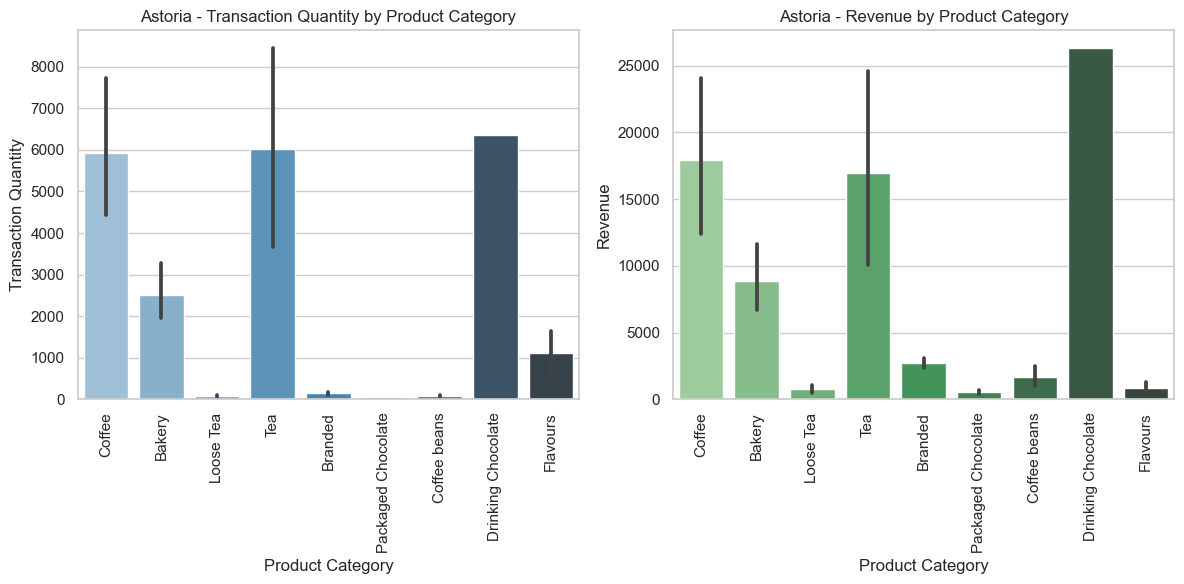

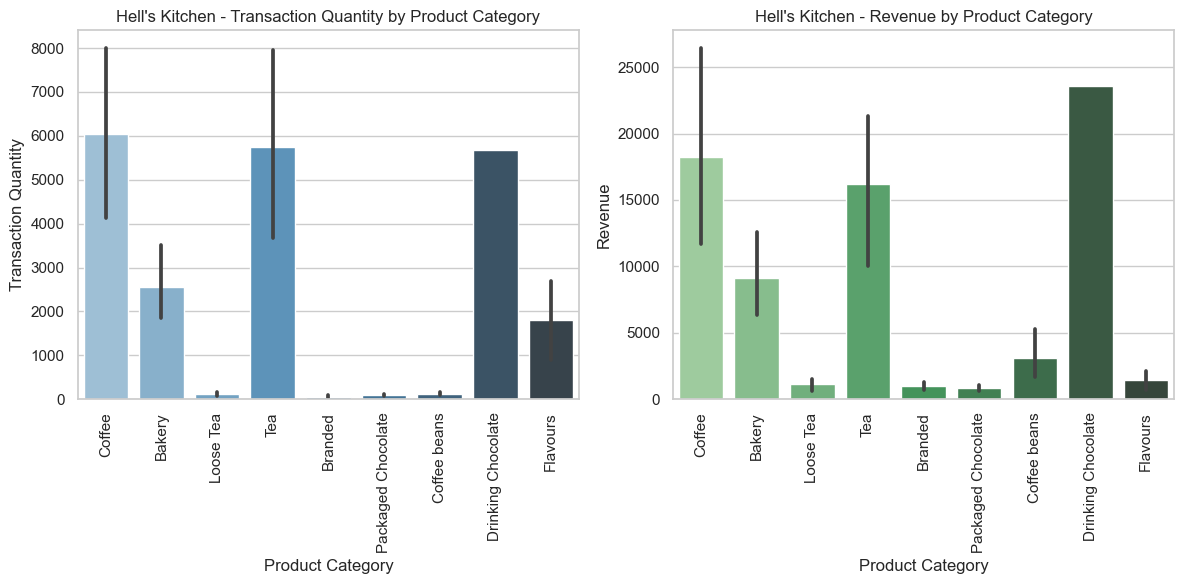

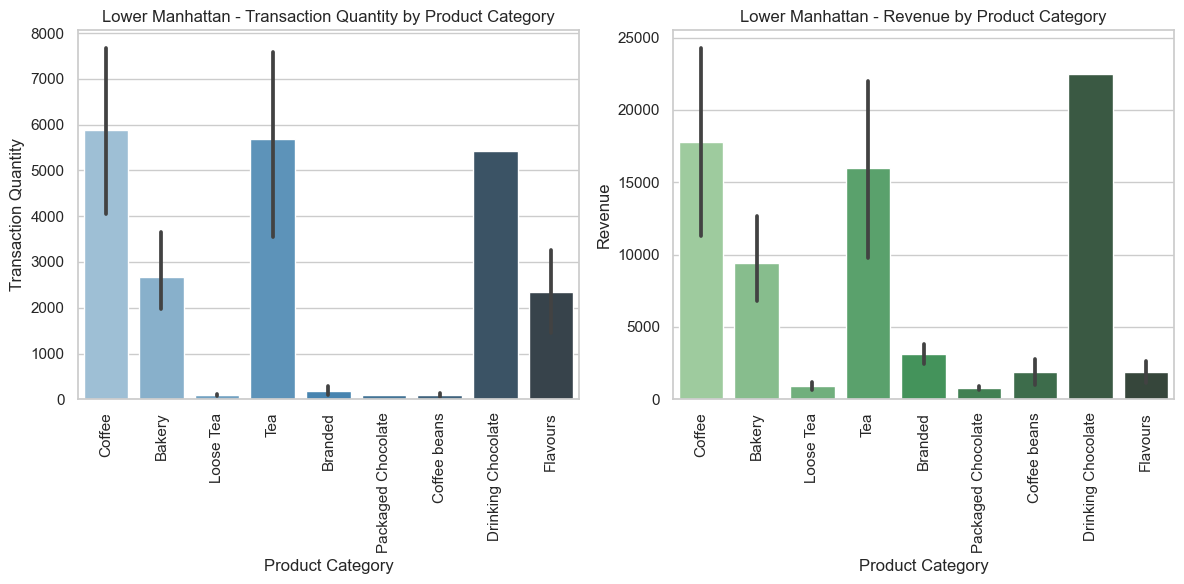

In [83]:
# Function to plot bar charts for each store
def plot_store_sales(store_df, store_name):
    plt.figure(figsize=(12, 6))

    # Subplot for Transaction Quantity
    plt.subplot(1, 2, 1)
    sns.barplot(data=store_df, x='product_category', y='transaction_qty', palette='Blues_d')
    plt.title(f'{store_name} - Transaction Quantity by Product Category')
    plt.xticks(rotation=90)
    plt.xlabel('Product Category')
    plt.ylabel('Transaction Quantity')

    # Subplot for Revenue
    plt.subplot(1, 2, 2)
    sns.barplot(data=store_df, x='product_category', y='revenue', palette='Greens_d')
    plt.title(f'{store_name} - Revenue by Product Category')
    plt.xticks(rotation=90)
    plt.xlabel('Product Category')
    plt.ylabel('Revenue')

    plt.tight_layout()
    plt.show()

# Visualize each store's data using the above function
for store_name, store_df in store_sales_dataframes.items():
    plot_store_sales(store_df, store_name)


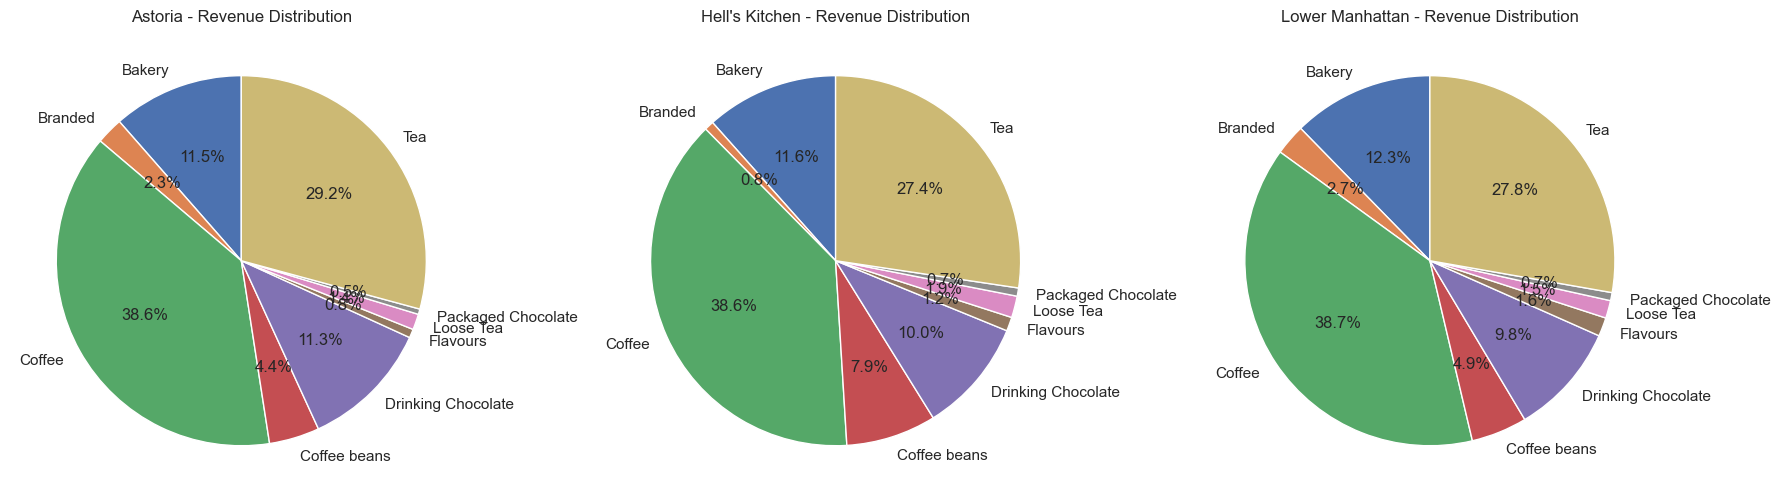

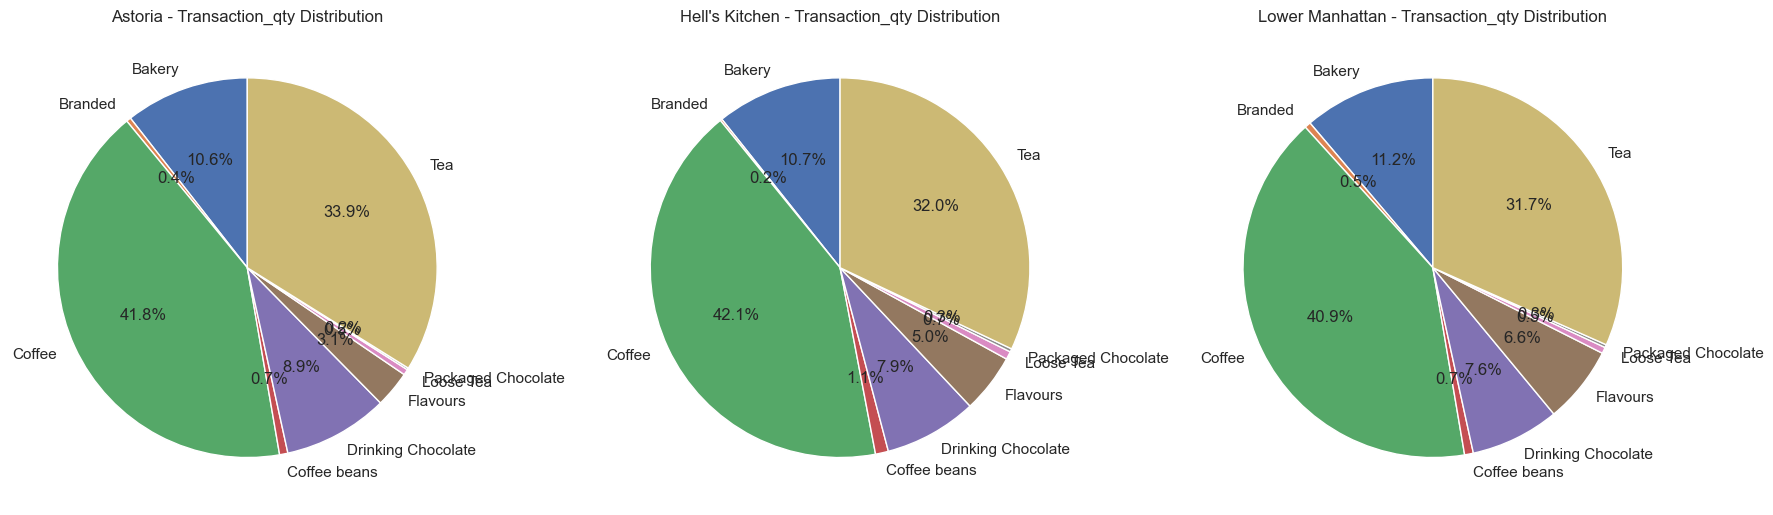

In [87]:
def plot_pie_charts_for_stores(store_sales_dataframes, metric='revenue'):
    # Create a 1x3 grid (or adjust for the number of stores)
    fig, axes = plt.subplots(1, len(store_sales_dataframes), figsize=(18, 7))

    # Loop through each store and its dataframe
    for i, (store_name, store_df) in enumerate(store_sales_dataframes.items()):
        # Aggregate data by product category
        store_df_agg = store_df.groupby('product_category').agg({metric: 'sum'}).reset_index()

        # Plot pie chart on the respective axis
        axes[i].pie(store_df_agg[metric], labels=store_df_agg['product_category'], autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'{store_name} - {metric.capitalize()} Distribution')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Plot pie charts for both revenue and transaction quantity
plot_pie_charts_for_stores(store_sales_dataframes, metric='revenue')
plot_pie_charts_for_stores(store_sales_dataframes, metric='transaction_qty')


### Analyze Store Performance

Compare sales performance across store locations to identify high and low-performing stores. Investigate factors driving success in top-performing locations.

#### Quantity Sold

In [88]:
# Calculate total quantity sold per store per month
monthly_transaction_qty = df.groupby(['store_location', 'transaction_month_name'])['transaction_qty'].sum().reset_index()

# Rename the total_quantity column
monthly_transaction_qty.rename(columns={'transaction_qty': 'total_quantity'}, inplace=True)

# Pivot the data so each month is a separate column
monthly_transaction_qty_pivot = monthly_transaction_qty.pivot(index='store_location', columns='transaction_month_name', values='total_quantity')

# Ensure the months are in the correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June']
monthly_transaction_qty_pivot = monthly_transaction_qty_pivot[month_order]

# Fill any missing values with 0 (if some months have no data for a particular store)
monthly_transaction_qty_pivot.fillna(0, inplace=True)

# Reset the index to get the 'store_location' as a normal column
monthly_transaction_qty_pivot.reset_index(inplace=True)

# Drop the transaction_month_name column if it exists
monthly_transaction_qty_pivot.index.name = None  # Remove index name
monthly_transaction_qty_pivot.columns.name = None  # Remove columns name

print("Monthly Transaction Quantity:")
monthly_transaction_qty_pivot

Monthly Transaction Quantity:


,store_location,January,February,March,April,May,June
0,Astoria,8281,7718,9999,12026,16114,16853
1,Hell's Kitchen,8340,7937,10198,12194,15944,17124
2,Lower Manhattan,8249,7895,10209,12249,16175,16965


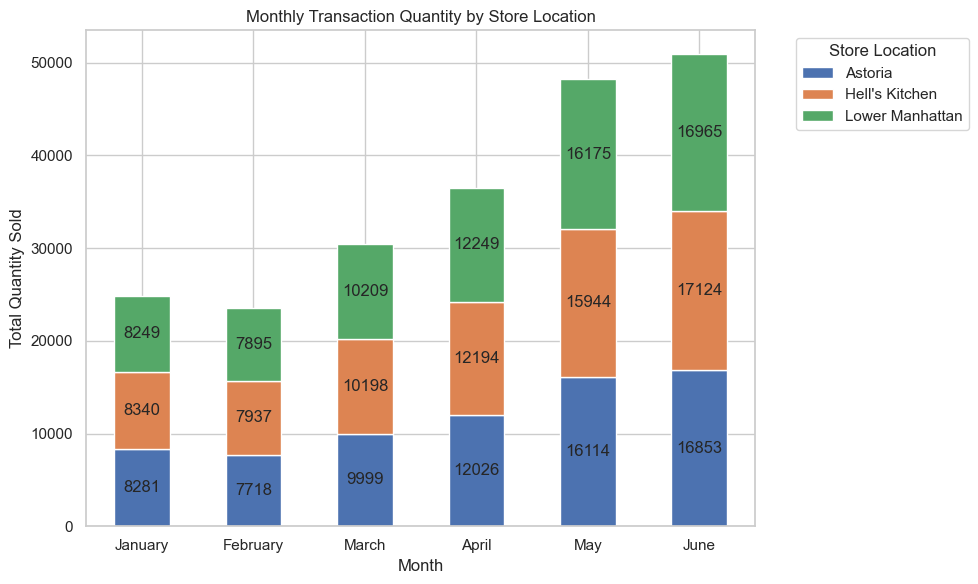

In [91]:
# # Plot stacked bar plot for monthly transaction quantities
# monthly_transaction_qty_pivot.set_index('store_location').T.plot(kind='bar', stacked=True, figsize=(10, 6))

# # Customize the chart
# plt.title('Monthly Transaction Quantity by Store Location')
# plt.xlabel('Month')
# plt.ylabel('Total Quantity Sold')
# plt.xticks(rotation=0)  # Keep the month names horizontal
# plt.legend(title='Store Location', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside plot
# plt.tight_layout()

# # Show the plot
# plt.show()

# Plot stacked bar plot for monthly transaction quantities
ax = monthly_transaction_qty_pivot.set_index('store_location').T.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the chart
plt.title('Monthly Transaction Quantity by Store Location')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=0)  # Keep the month names horizontal
plt.legend(title='Store Location', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside plot
plt.tight_layout()

# Add annotations for the values on each bar
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fmt='%d')  # Display integer values inside the bars

# Show the plot
plt.show()


In [102]:
# Set bar width and create an array for the x-axis positions of the months
bar_width = 0.25
x = np.arange(len(month_order))  # Number of months

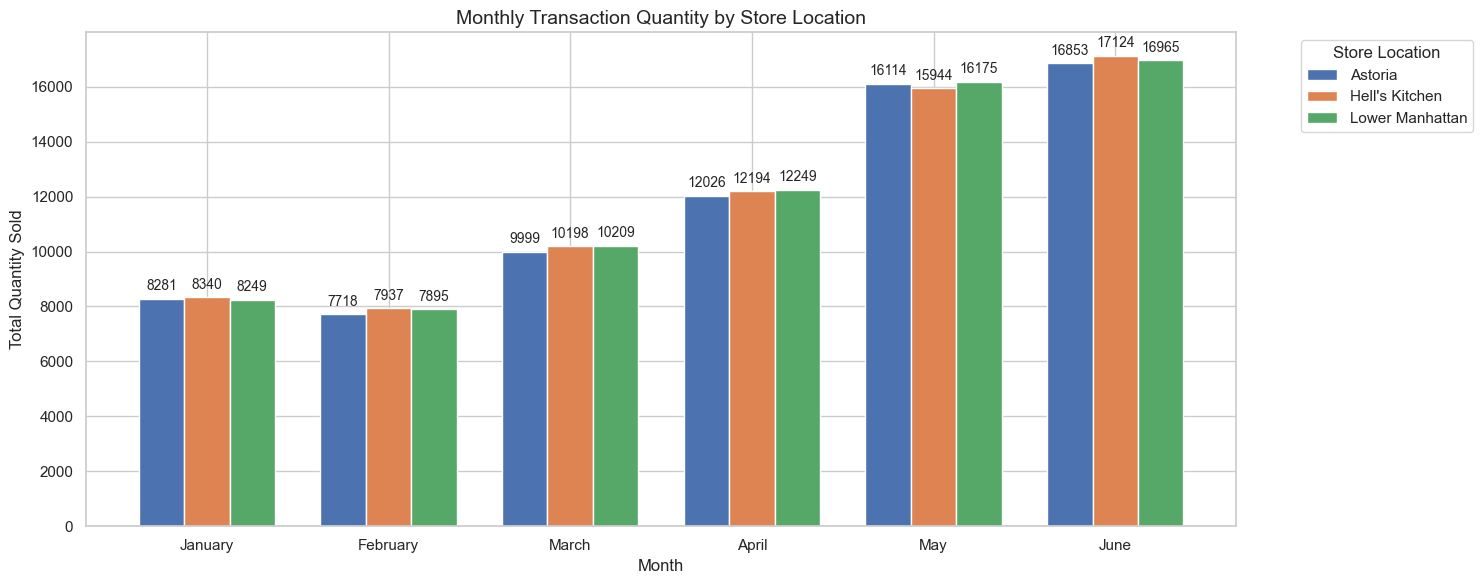

In [103]:
# Set figure size
plt.figure(figsize=(15, 6))

# Plot bars for each store location
for i, store in enumerate(monthly_transaction_qty_pivot['store_location']):
    plt.bar(x + i * bar_width, monthly_transaction_qty_pivot.loc[i, month_order], 
            width=bar_width, label=store)

    # Add values on top of the bars
    for j in range(len(month_order)):
        plt.text(x[j] + i * bar_width, 
                 monthly_transaction_qty_pivot.loc[i, month_order][j] + 200,  # Adjust height for text
                 str(int(monthly_transaction_qty_pivot.loc[i, month_order][j])), 
                 ha='center', va='bottom', fontsize=10)

# Customize the chart
plt.title('Monthly Transaction Quantity by Store Location', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(x + bar_width, month_order)  # Ensure correct x-axis labels with the group positioning
plt.legend(title='Store Location', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside plot
plt.tight_layout()

# Show the plot
plt.show()

In [99]:
# Calculate total Revenue per store per month
monthly_revenue = df.groupby(['store_location', 'transaction_month_name'])['revenue'].sum().reset_index()

# Rename the revenue column
monthly_revenue.rename(columns={'revenue': 'revenue'}, inplace=True)

# Pivot the data so each month is a separate column
monthly_revenue_pivot = monthly_revenue.pivot(index='store_location', columns='transaction_month_name', values='revenue')

# Ensure the months are in the correct order
monthly_revenue_pivot = monthly_revenue_pivot[month_order]

# Fill any missing values with 0 (if some months have no data for a particular store)
monthly_revenue_pivot.fillna(0, inplace=True)

# Reset the index to get the 'store_location' as a normal column
monthly_revenue_pivot.reset_index(inplace=True)

# Drop the transaction_month_name column if it exists
monthly_revenue_pivot.index.name = None
monthly_revenue_pivot.columns.name = None

print("Monthly Revenue:")
monthly_revenue_pivot

Monthly Revenue:


,store_location,January,February,March,April,May,June
0,Astoria,27313.66,25105.34,32835.43,39477.61,52428.76,55083.11
1,Hell's Kitchen,27820.65,25719.80,33110.57,40304.14,52598.93,56957.08
2,Lower Manhattan,26543.43,25320.05,32888.68,39159.33,51700.07,54445.69


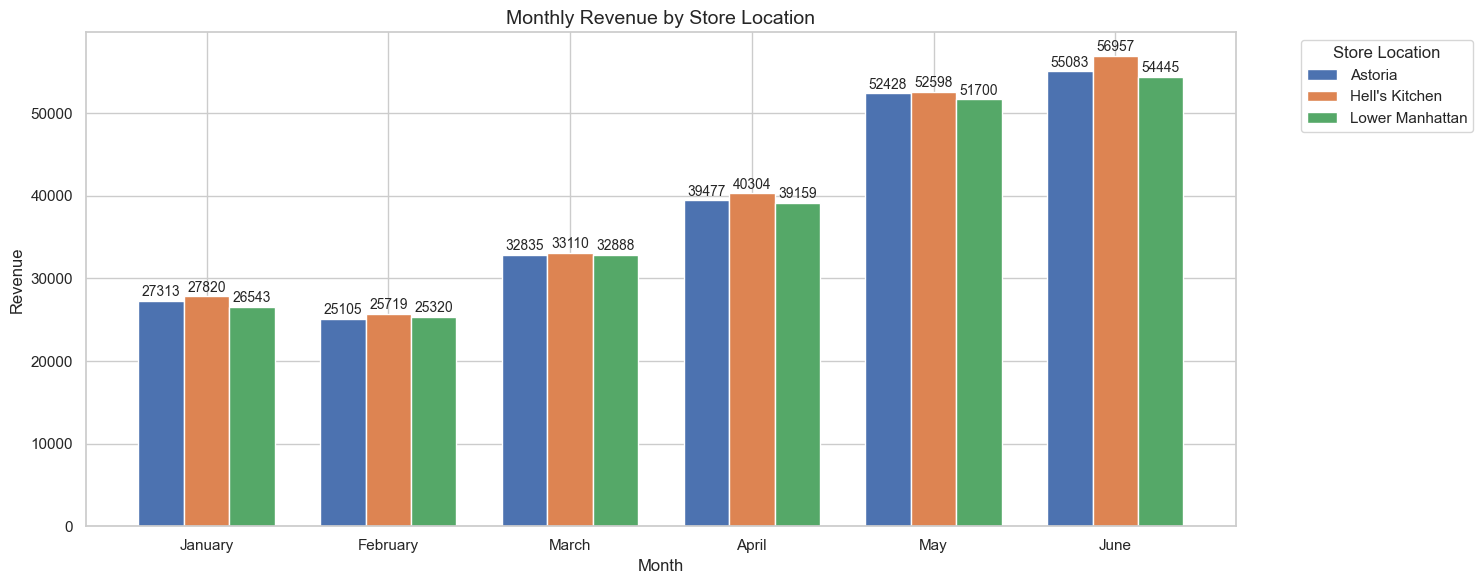

In [104]:
# Set figure size
plt.figure(figsize=(15, 6))

# Plot bars for each store location
for i, store in enumerate(monthly_revenue_pivot['store_location']):
    plt.bar(x + i * bar_width, monthly_revenue_pivot.loc[i, month_order], 
            width=bar_width, label=store)

    # Add values on top of the bars
    for j in range(len(month_order)):
        plt.text(x[j] + i * bar_width, 
                 monthly_revenue_pivot.loc[i, month_order][j] + 200,  # Adjust height for text
                 str(int(monthly_revenue_pivot.loc[i, month_order][j])), 
                 ha='center', va='bottom', fontsize=10)

# Customize the chart
plt.title('Monthly Revenue by Store Location', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(x + bar_width, month_order)  # Ensure correct x-axis labels with the group positioning
plt.legend(title='Store Location', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside plot
plt.tight_layout()

# Show the plot
plt.show()

In [105]:
# Calculate total transaction per store per month
monthly_transaction_count = df.groupby(['store_location', 'transaction_month_name'])['transaction_id'].count().reset_index()

# Rename the revenue column
monthly_transaction_count.rename(columns={'transaction_id': 'transaction_count'}, inplace=True)

# Pivot the data so each month is a separate column
monthly_transaction_count_pivot = monthly_transaction_count.pivot(index='store_location', columns='transaction_month_name', values='transaction_count')

# Ensure the months are in the correct order
monthly_transaction_count_pivot = monthly_transaction_count_pivot[month_order]

# Fill any missing values with 0 (if some months have no data for a particular store)
monthly_transaction_count_pivot.fillna(0, inplace=True)

# Reset the index to get the 'store_location' as a normal column
monthly_transaction_count_pivot.reset_index(inplace=True)

# Drop the transaction_month_name column if it exists
monthly_transaction_count_pivot.index.name = None  
monthly_transaction_count_pivot.columns.name = None

print("Monthly Transaction Count:")
monthly_transaction_count_pivot

Monthly Transaction Count:


,store_location,January,February,March,April,May,June
0,Astoria,5913,5490,7180,8556,11475,11985
1,Hell's Kitchen,5868,5606,7267,8629,11294,12071
2,Lower Manhattan,5533,5263,6782,8150,10758,11296


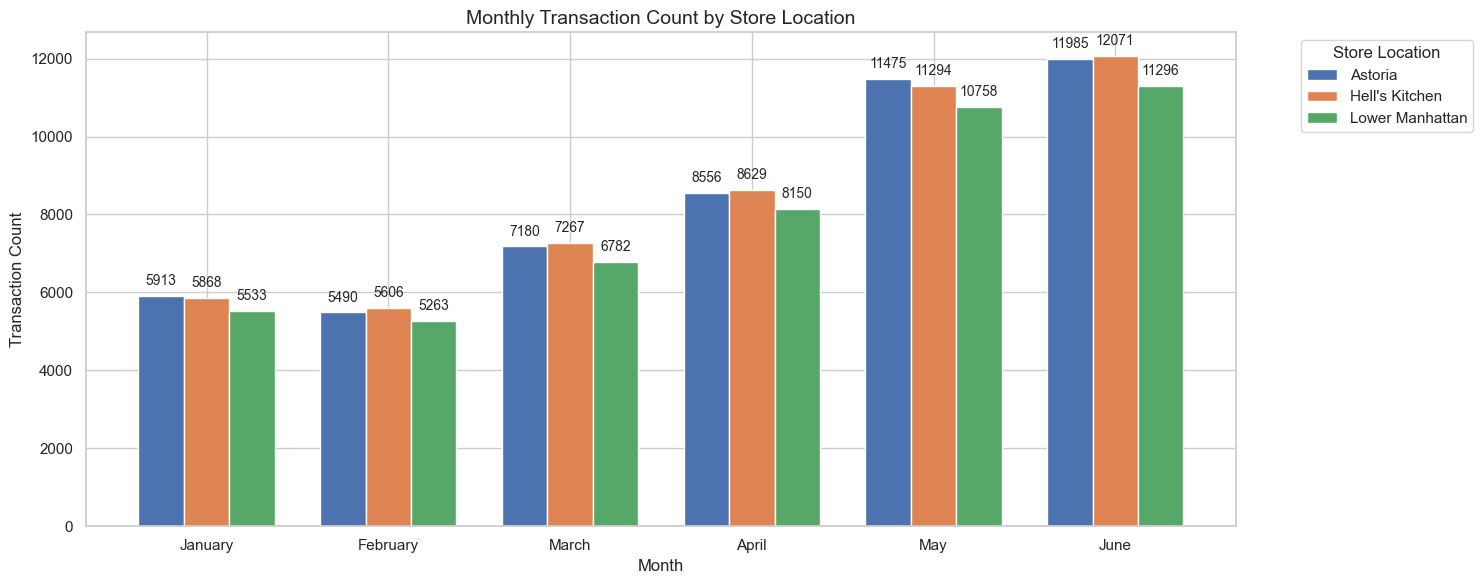

In [106]:
# Set figure size
plt.figure(figsize=(15, 6))

# Plot bars for each store location
for i, store in enumerate(monthly_transaction_count_pivot['store_location']):
    plt.bar(x + i * bar_width, monthly_transaction_count_pivot.loc[i, month_order], 
            width=bar_width, label=store)

    # Add values on top of the bars
    for j in range(len(month_order)):
        plt.text(x[j] + i * bar_width, 
                 monthly_transaction_count_pivot.loc[i, month_order][j] + 200,  # Adjust height for text
                 str(int(monthly_transaction_count_pivot.loc[i, month_order][j])), 
                 ha='center', va='bottom', fontsize=10)

# Customize the chart
plt.title('Monthly Transaction Count by Store Location', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)
plt.xticks(x + bar_width, month_order)  # Ensure correct x-axis labels with the group positioning
plt.legend(title='Store Location', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside plot
plt.tight_layout()

# Show the plot
plt.show()

### Product Types Performance Classification

Classify products into Stars, Cash Cows, Dogs, and Question Marks based on their market growth and sales share to guide strategic decision-making on product focus.

In [25]:
total_revenue = df['revenue'].sum()

In [28]:
# total_revenue = df['revenue'].sum()

name_performance = df.groupby('product_name').agg({'revenue': 'sum', 'transaction_id': 'count'}).reset_index()
cat_performance = df.groupby('product_category').agg({'revenue': 'sum', 'transaction_id': 'count'}).reset_index()
type_performance = df.groupby('product_type').agg({'revenue': 'sum', 'transaction_id': 'count'}).reset_index()

In [29]:
total_revenue_name = name_performance['revenue'].sum()
total_revenue_cat = cat_performance['revenue'].sum()
total_revenue_type = type_performance['revenue'].sum()

name_performance['market_share'] = (name_performance['revenue'] / total_revenue_name) * 100
cat_performance['market_share'] = (cat_performance['revenue'] / total_revenue_cat) * 100
type_performance['market_share'] = (type_performance['revenue'] / total_revenue_type) * 100

In [30]:
name_monthly_revenue = df.groupby(['transaction_month', 'product_name'])['revenue'].sum().reset_index()
cat_monthly_revenue = df.groupby(['transaction_month', 'product_category'])['revenue'].sum().reset_index()
type_monthly_revenue = df.groupby(['transaction_month', 'product_type'])['revenue'].sum().reset_index()

In [31]:
name_revenue_growth = name_monthly_revenue.groupby('product_name')['revenue'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100).reset_index()
cat_revenue_growth = cat_monthly_revenue.groupby('product_category')['revenue'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100).reset_index()
type_revenue_growth = type_monthly_revenue.groupby('product_type')['revenue'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100).reset_index()

name_revenue_growth.columns = ['product_name', 'growth_rate']
cat_revenue_growth.columns = ['product_category', 'growth_rate']
type_revenue_growth.columns = ['product_type', 'growth_rate']

name_performance.rename(columns={'transaction_id': 'transaction_count'}, inplace=True)
cat_performance.rename(columns={'transaction_id': 'transaction_count'}, inplace=True)
type_performance.rename(columns={'transaction_id': 'transaction_count'}, inplace=True)


In [107]:
name_bcg_data = pd.merge(name_performance, name_revenue_growth, on='product_name')

# Calculate thresholds for market share and growth rate
name_market_share_threshold = name_bcg_data['market_share'].median()
name_growth_rate_threshold = name_bcg_data['growth_rate'].median()

# Classify products by market share (Low/High) and growth rate (Low Growth/High Growth)
name_bcg_data['market_share_class'] = pd.cut(
    name_bcg_data['market_share'],
    bins=[-float('inf'), name_market_share_threshold, float('inf')],
    labels=['Low', 'High']
)

name_bcg_data['growth_rate_class'] = pd.cut(
    name_bcg_data['growth_rate'],
    bins=[-float('inf'), name_growth_rate_threshold, float('inf')],
    labels=['Low Growth', 'High Growth']
)

# Combine classifications into a single category
name_bcg_data['BCG_category'] = name_bcg_data['market_share_class'].astype(str) + name_bcg_data['growth_rate_class'].astype(str)

# Mapping combined categories to BCG Matrix types
name_bcg_data['BCG_category'] = name_bcg_data['BCG_category'].map({
    'LowLow Growth': 'Dogs',
    'LowHigh Growth': 'Question Marks',
    'HighLow Growth': 'Cash Cows',
    'HighHigh Growth': 'Stars'
})

# Display the results
name_bcg_data[['product_name', 'market_share', 'growth_rate', 'BCG_category']]

,product_name,market_share,growth_rate,BCG_category
0,Almond Croissant,1.025759,110.301235,Question Marks
1,Brazilian,5.401522,90.384240,Cash Cows
2,Brazilian - Organic,0.551221,170.000000,Question Marks
3,Cappuccino,4.813775,117.271615,Stars
4,Carmel,0.294900,87.925697,Dogs
5,Chili Mayan,0.282313,77.777778,Dogs
6,Chocolate,0.304288,91.640867,Dogs
7,Chocolate Chip Biscotti,0.965776,115.693935,Question Marks
8,Chocolate Croissant,1.663677,104.187927,Stars
9,Civet Cat,1.674269,108.108108,Stars


In [141]:
# Create a color palette for the BCG categories
bcg_palette = {
    'Stars': 'gold',
    'Cash Cows': 'lightgreen',
    'Dogs': 'lightcoral',
    'Question Marks': 'lightskyblue'
}

# Create a shape mapping for BCG categories
shape_mapping = {
    'Stars': 'o',             # Circle
    'Cash Cows': 's',        # Square
    'Dogs': 'X',             # X shape
    'Question Marks': '^'    # Triangle
}

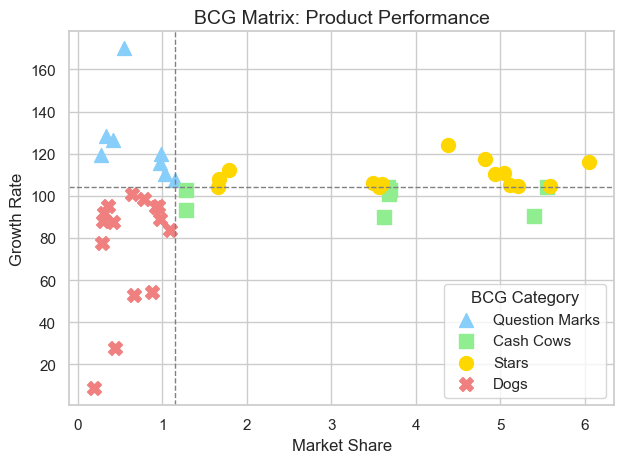

In [142]:
# Scatter plot for BCG matrix
for category in name_bcg_data['BCG_category'].unique():
    subset = name_bcg_data[name_bcg_data['BCG_category'] == category]
    plt.scatter(
        subset['market_share'],
        subset['growth_rate'],
        color=bcg_palette[category],
        marker=shape_mapping[category],
        label=category,
        s=100  # You can adjust the size of the points
    )

# Add labels and title
plt.title('BCG Matrix: Product Performance', fontsize=14)
plt.xlabel('Market Share', fontsize=12)
plt.ylabel('Growth Rate', fontsize=12)

# Add threshold lines for market share and growth rate
plt.axvline(name_market_share_threshold, color='gray', linestyle='--', lw=1)
plt.axhline(name_growth_rate_threshold, color='gray', linestyle='--', lw=1)

# Show the legend
plt.legend(title='BCG Category')
plt.tight_layout()

# Display the plot
plt.show()

In [33]:
cat_bcg_data = pd.merge(cat_performance, cat_revenue_growth, on='product_category')

# Calculate thresholds for market share and growth rate
cat_market_share_threshold = cat_bcg_data['market_share'].median()
cat_growth_rate_threshold = cat_bcg_data['growth_rate'].median()

# Classify products by market share (Low/High) and growth rate (Low Growth/High Growth)
cat_bcg_data['market_share_class'] = pd.cut(
    cat_bcg_data['market_share'],
    bins=[-float('inf'), cat_market_share_threshold, float('inf')],
    labels=['Low', 'High']
)

cat_bcg_data['growth_rate_class'] = pd.cut(
    cat_bcg_data['growth_rate'],
    bins=[-float('inf'), cat_growth_rate_threshold, float('inf')],
    labels=['Low Growth', 'High Growth']
)

# Combine classifications into a single category
cat_bcg_data['BCG_category'] = cat_bcg_data['market_share_class'].astype(str) + cat_bcg_data['growth_rate_class'].astype(str)

# Mapping combined categories to BCG Matrix types
cat_bcg_data['BCG_category'] = cat_bcg_data['BCG_category'].map({
    'LowLow Growth': 'Dogs',
    'LowHigh Growth': 'Question Marks',
    'HighLow Growth': 'Cash Cows',
    'HighHigh Growth': 'Stars'
})

# Display the results
cat_bcg_data[['product_category', 'market_share', 'growth_rate', 'BCG_category']]

,product_category,market_share,growth_rate,BCG_category
0,Bakery,11.779363,101.885221,Cash Cows
1,Branded,1.947161,80.582011,Dogs
2,Coffee,38.630178,107.279364,Stars
3,Coffee beans,5.736197,88.983366,Dogs
4,Drinking Chocolate,10.362725,105.163263,Stars
5,Flavours,1.203299,106.075534,Question Marks
6,Loose Tea,1.604665,114.139970,Question Marks
7,Packaged Chocolate,0.630733,90.090815,Dogs
8,Tea,28.105679,104.417170,Cash Cows


In [34]:
type_bcg_data = pd.merge(type_performance, type_revenue_growth, on='product_type')

# Calculate thresholds for market share and growth rate
type_market_share_threshold = type_bcg_data['market_share'].median()
type_growth_rate_threshold = type_bcg_data['growth_rate'].median()

# Classify products by market share (Low/High) and growth rate (Low Growth/High Growth)
type_bcg_data['market_share_class'] = pd.cut(
    type_bcg_data['market_share'],
    bins=[-float('inf'), type_market_share_threshold, float('inf')],
    labels=['Low', 'High']
)

type_bcg_data['growth_rate_class'] = pd.cut(
    type_bcg_data['growth_rate'],
    bins=[-float('inf'), type_growth_rate_threshold, float('inf')],
    labels=['Low Growth', 'High Growth']
)

# Combine classifications into a single category
type_bcg_data['BCG_category'] = type_bcg_data['market_share_class'].astype(str) + type_bcg_data['growth_rate_class'].astype(str)

# Mapping combined categories to BCG Matrix types
type_bcg_data['BCG_category'] = type_bcg_data['BCG_category'].map({
    'LowLow Growth': 'Dogs',
    'LowHigh Growth': 'Question Marks',
    'HighLow Growth': 'Cash Cows',
    'HighHigh Growth': 'Stars'
})

# Display the results
type_bcg_data[['product_type', 'market_share', 'growth_rate', 'BCG_category']]

,product_type,market_share,growth_rate,BCG_category
0,Barista Espresso,13.080221,108.962643,Stars
1,Biscotti,2.832453,101.787090,Cash Cows
2,Black tea,0.388066,66.666667,Dogs
3,Brewed Black tea,6.859066,105.049228,Stars
4,Brewed Chai tea,11.030422,107.592921,Stars
5,Brewed Green tea,3.413291,90.514999,Cash Cows
6,Brewed herbal tea,6.802899,106.027750,Stars
7,Chai tea,0.615509,208.582964,Question Marks
8,Clothing,0.881925,54.563492,Dogs
9,Drinking Chocolate,0.390382,93.268927,Dogs


### Identify Peak Sales Times and Days


Analyze sales patterns by day of the week and time of day to understand when stores experience the highest traffic. This can help optimize staffing and inventory levels.

In [35]:
# Create a list to hold DataFrames for each day
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_dfs = {}

# Loop through each day and create a separate DataFrame for each
for day in days:
    day_df = df[df['transaction_day'] == day].groupby('transaction_hour').agg({
        'transaction_qty': 'sum',
        'revenue': 'sum'
    }).reset_index()
    
    # Sort by transaction hour
    day_df = day_df.sort_values(by='transaction_hour').reset_index(drop=True)
    
    # Store the DataFrame in a dictionary
    day_dfs[day] = day_df

In [36]:
# Create a combined DataFrame with transaction_hour as index and columns for each day
combined_df = pd.DataFrame()

# Loop through the dictionary to populate the combined DataFrame
for day, day_df in day_dfs.items():
    combined_df[day] = day_df.set_index('transaction_hour')['revenue']

# Fill NaN values with 0 (if any hours are missing)
combined_df.fillna(0, inplace=True)

# Reset index to make transaction_hour a column
combined_df.reset_index(inplace=True)

# Display the combined DataFrame
combined_df

,transaction_hour,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,6,3098.58,2320.25,3396.23,3464.90,3385.73,2913.85,3320.73
1,7,9516.52,8841.71,8905.86,9209.23,9386.04,8775.02,8892.09
2,8,11604.69,12950.19,11991.45,11420.49,11746.65,11370.86,11615.54
3,9,11898.33,13588.47,12246.40,10963.73,12750.00,11333.85,12388.75
4,10,12427.25,13497.68,12382.48,12091.09,13155.66,12736.48,12382.75
5,11,7179.09,5877.41,7055.85,6898.55,6827.84,6361.41,6118.99
6,12,6139.64,5172.64,5540.35,6073.93,5685.49,5957.75,5622.99
7,13,5771.26,5443.46,6223.15,5972.46,5499.49,5549.45,5908.18
8,14,6463.31,5621.56,5872.42,6114.61,5840.33,5626.89,5765.62
9,15,6159.49,5852.24,5974.31,6087.68,6098.13,5946.50,5614.75


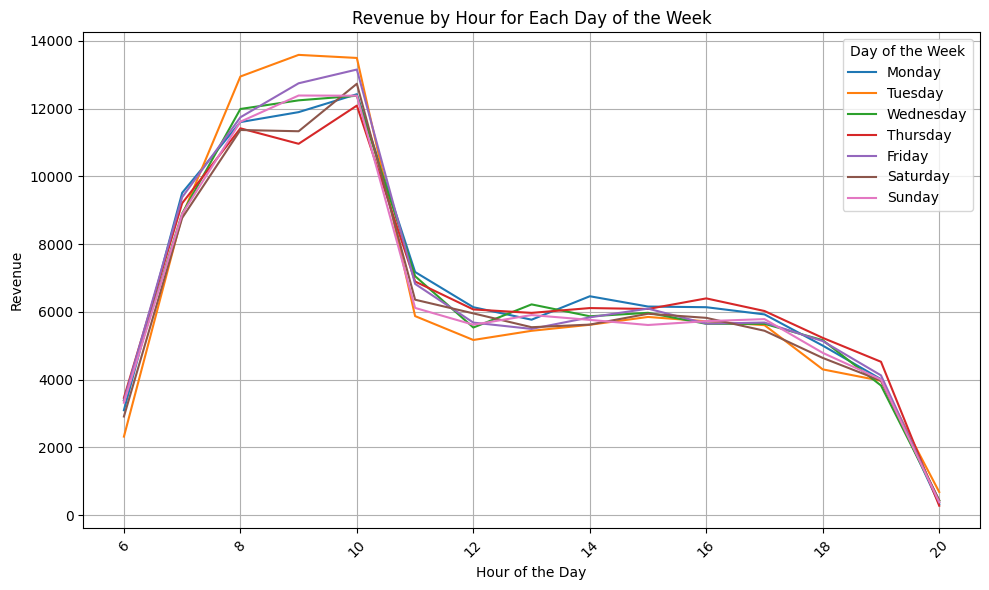

In [40]:
import matplotlib.pyplot as plt

# Plot revenue for each day
plt.figure(figsize=(10,6))

for day in days:
    plt.plot(combined_df['transaction_hour'], combined_df[day], label=day)

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Revenue')
plt.title('Revenue by Hour for Each Day of the Week')
plt.legend(title="Day of the Week")

# Show the plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
# df['transaction_month_name'] = df['transaction_date'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['transaction_month_name'] = pd.Categorical(df['transaction_month_name'], categories=month_order, ordered=True)
df['transaction_day'] = pd.Categorical(df['transaction_day'], categories=day_order, ordered=True)


monthly_day_revenue = df.groupby(['transaction_month_name', 'transaction_day']).agg({
    'revenue': 'sum',
    'transaction_id': 'count'  # Transaction count
}).reset_index()

monthly_day_revenue.rename(columns={'transaction_id': 'transaction_count'}, inplace=True)
monthly_day_revenue

C:\Users\user\AppData\Local\Temp\ipykernel_3576\209146396.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_day_revenue = df.groupby(['transaction_month_name', 'transaction_day']).agg({


,transaction_month_name,transaction_day,revenue,transaction_count
0,January,Monday,13238.68,2814
1,January,Tuesday,13739.53,2766
2,January,Wednesday,10358.36,2229
3,January,Thursday,10523.26,2283
4,January,Friday,10653.28,2291
5,January,Saturday,10422.11,2206
6,January,Sunday,12742.52,2725
7,February,Monday,11092.51,2373
8,February,Tuesday,10203.11,2199
9,February,Wednesday,11085.48,2350


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


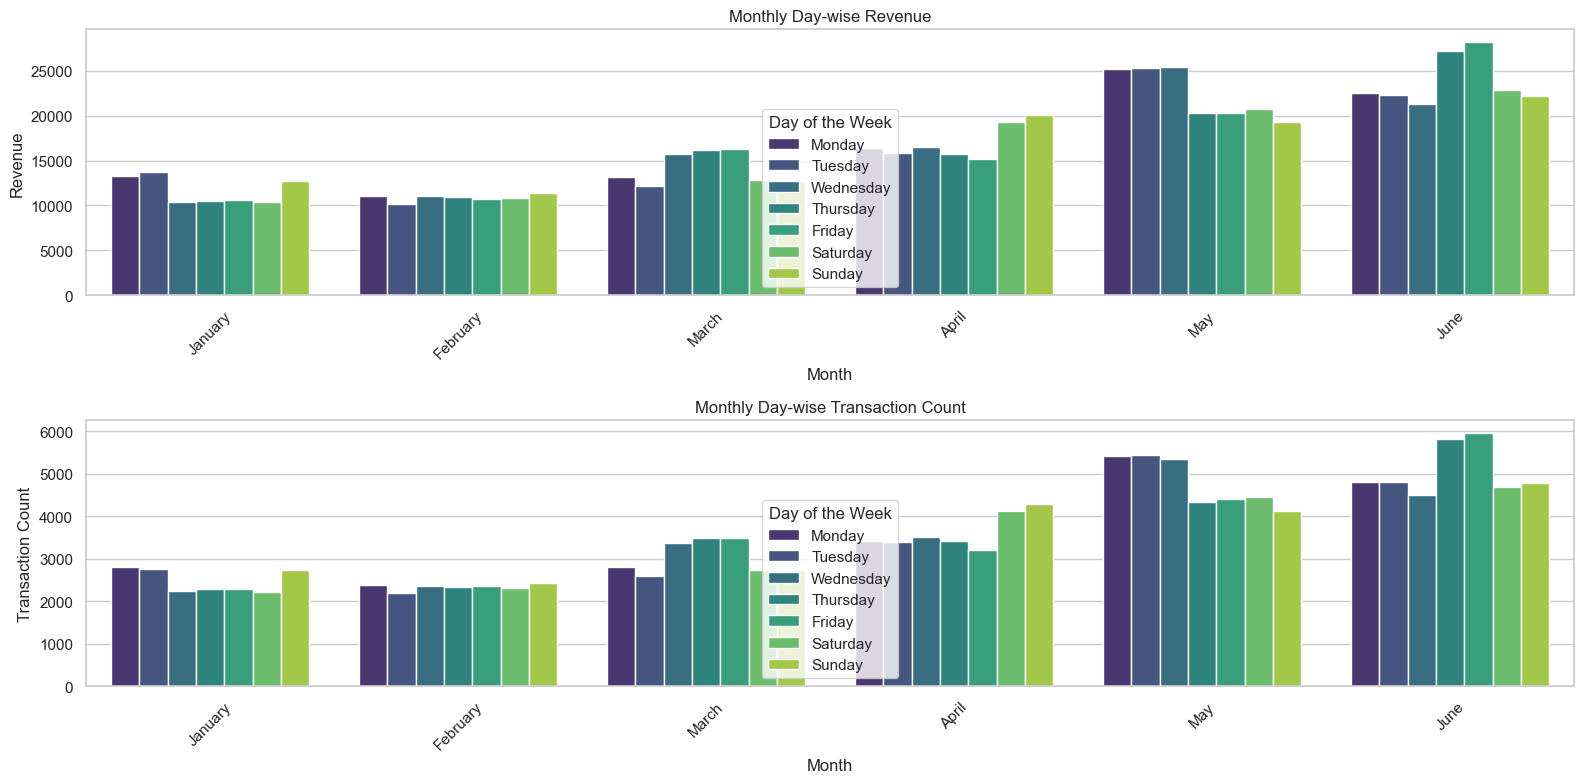

In [38]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# Barplot for Revenue
plt.subplot(2, 1, 1)
sns.barplot(x='transaction_month_name', y='revenue', hue='transaction_day', data=monthly_day_revenue, palette='viridis')
plt.title('Monthly Day-wise Revenue')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Day of the Week')

# Barplot for Transaction Count
plt.subplot(2, 1, 2)
sns.barplot(x='transaction_month_name', y='transaction_count', hue='transaction_day', data=monthly_day_revenue, palette='viridis')
plt.title('Monthly Day-wise Transaction Count')
plt.ylabel('Transaction Count')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Day of the Week')

plt.tight_layout()
plt.show()

### Explore the Impact of Product Size on Sales

Evaluate whether product size (e.g., small, regular, large) influences sales performance. Investigate if larger sizes drive more revenue or if customers prefer smaller sizes for certain product types.

In [57]:
# Group by product size and product type to analyze sales by size
size_sales = df.groupby(['product_size', 'product_type']).agg({
    'transaction_qty': 'sum',
    'revenue': 'sum'
}).reset_index()

# Sort by total revenue to see which sizes perform best
size_performance = size_sales.sort_values(by='revenue', ascending=False)

# Display performance of product sizes
print("Product Size Performance:")
size_performance

Product Size Performance:


,product_size,product_type,transaction_qty,revenue
2,large,Brewed Chai tea,12924,43558.40
7,large,Hot chocolate,9121,42157.75
44,unknown,Scone,10465,36866.12
12,regular,Brewed Chai tea,13326,33523.55
27,unknown,Barista Espresso,8868,33255.00
17,regular,Hot chocolate,8336,30258.25
6,large,Gourmet brewed coffee,8422,27379.50
1,large,Brewed Black tea,8554,25662.00
42,unknown,Pastry,6961,25655.99
4,large,Brewed herbal tea,8439,25317.00


In [58]:
# Filter out rows where product_size is 'unknown'
test = df[df['product_size'].isin(['large', 'regular', 'small'])]

# Group by product size and product type to analyze sales by size
size_sales = test.groupby(['product_size', 'product_type', 'product_category']).agg({
    'transaction_qty': 'sum',
    'revenue': 'sum'
}).reset_index()

# Sort by total revenue to see which sizes perform best
size_performance = size_sales.sort_values(by='revenue', ascending=False)

# Display performance of product sizes
print("Product Size Performance:")
size_performance

Product Size Performance:


,product_size,product_type,product_category,transaction_qty,revenue
2,large,Brewed Chai tea,Tea,12924,43558.40
7,large,Hot chocolate,Drinking Chocolate,9121,42157.75
12,regular,Brewed Chai tea,Tea,13326,33523.55
17,regular,Hot chocolate,Drinking Chocolate,8336,30258.25
6,large,Gourmet brewed coffee,Coffee,8422,27379.50
1,large,Brewed Black tea,Tea,8554,25662.00
4,large,Brewed herbal tea,Tea,8439,25317.00
16,regular,Gourmet brewed coffee,Coffee,8940,24546.50
11,regular,Brewed Black tea,Tea,8908,22270.00
14,regular,Brewed herbal tea,Tea,8889,22222.50


In [59]:
# Filter to include only coffee products
cof_category = test[test['product_category'] == 'Coffee']

# Group and analyze
cof_size_sales = cof_category.groupby(['product_size', 'product_type']).agg({
    'transaction_qty': 'sum',
    'revenue': 'sum'
}).reset_index()

# Sort and display
cof_size_performance = cof_size_sales.sort_values(by='revenue', ascending=False)
print("Product Size Performance for Coffee:")
cof_size_performance

Product Size Performance for Coffee:


,product_size,product_type,transaction_qty,revenue
2,large,Gourmet brewed coffee,8422,27379.50
7,regular,Gourmet brewed coffee,8940,24546.50
5,regular,Barista Espresso,4497,19112.25
11,small,Gourmet brewed coffee,8611,18108.60
0,large,Barista Espresso,4151,17641.75
4,large,Premium brewed coffee,4395,16481.25
3,large,Organic brewed coffee,4317,15109.50
8,regular,Organic brewed coffee,4385,13155.00
9,regular,Premium brewed coffee,4018,12455.80
1,large,Drip coffee,3997,11991.00


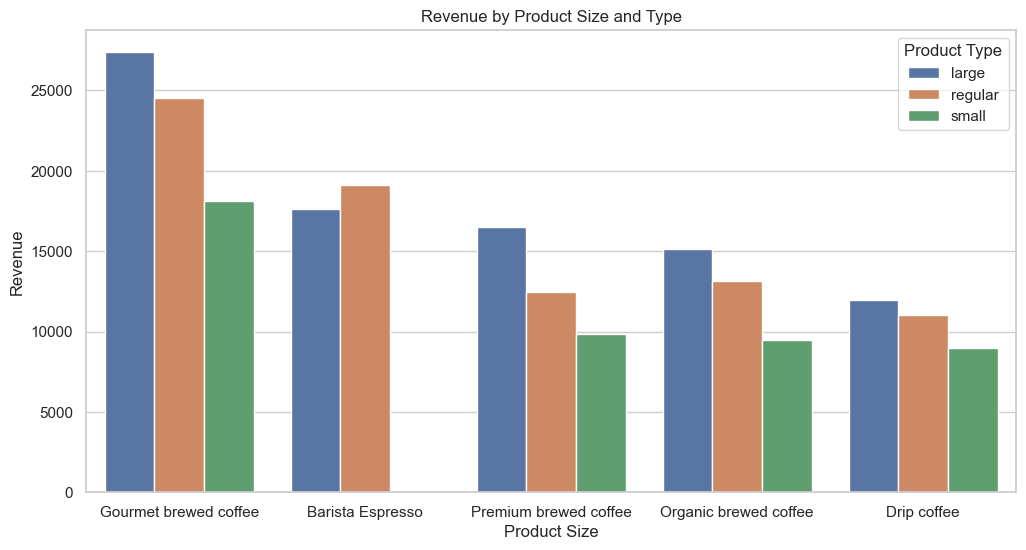

In [60]:
plt.figure(figsize=(12, 6))
sns.barplot(data=cof_size_performance, x='product_type', y='revenue', hue='product_size')
plt.title('Revenue by Product Size and Type')
plt.ylabel('Revenue')
plt.xlabel('Product Size')
plt.legend(title='Product Type')
plt.show()

In [61]:
# Filter to include only coffee products
tea_category = test[test['product_category'] == 'Tea']

# Group and analyze
tea_size_sales = tea_category.groupby(['product_size', 'product_type']).agg({
    'transaction_qty': 'sum',
    'revenue': 'sum'
}).reset_index()

# Sort and display
tea_size_performance = tea_size_sales.sort_values(by='revenue', ascending=False)
print("Product Size Performance for Tea:")
tea_size_performance

Product Size Performance for Tea:


,product_size,product_type,transaction_qty,revenue
1,large,Brewed Chai tea,12924,43558.40
5,regular,Brewed Chai tea,13326,33523.55
0,large,Brewed Black tea,8554,25662.00
3,large,Brewed herbal tea,8439,25317.00
4,regular,Brewed Black tea,8908,22270.00
7,regular,Brewed herbal tea,8889,22222.50
2,large,Brewed Green tea,4220,12660.00
6,regular,Brewed Green tea,4477,11192.50


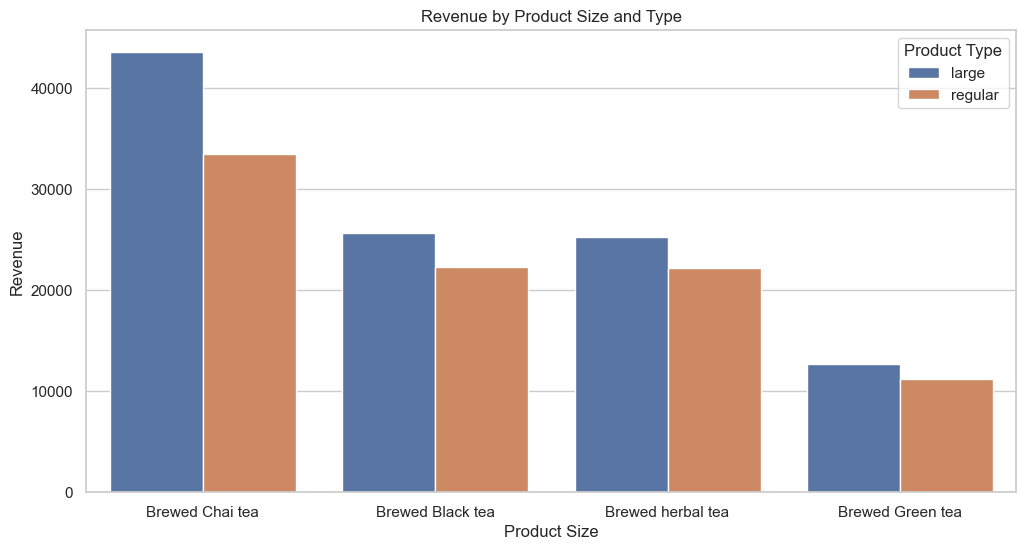

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(data=tea_size_performance, x='product_type', y='revenue', hue='product_size')
plt.title('Revenue by Product Size and Type')
plt.ylabel('Revenue')
plt.xlabel('Product Size')
plt.legend(title='Product Type')
plt.show()

In [63]:
# Filter to include only chocolate products
choco_category = test[test['product_category'] == 'Drinking Chocolate']

# Group and analyze
choco_size_sales = choco_category.groupby(['product_size', 'product_type']).agg({
    'transaction_qty': 'sum',
    'revenue': 'sum'
}).reset_index()

# Sort and display
choco_size_performance = choco_size_sales.sort_values(by='revenue', ascending=False)
print("Product Size Performance for Chocolate Drink:")
choco_size_performance

Product Size Performance for Chocolate Drink:


,product_size,product_type,transaction_qty,revenue
0,large,Hot chocolate,9121,42157.75
1,regular,Hot chocolate,8336,30258.25


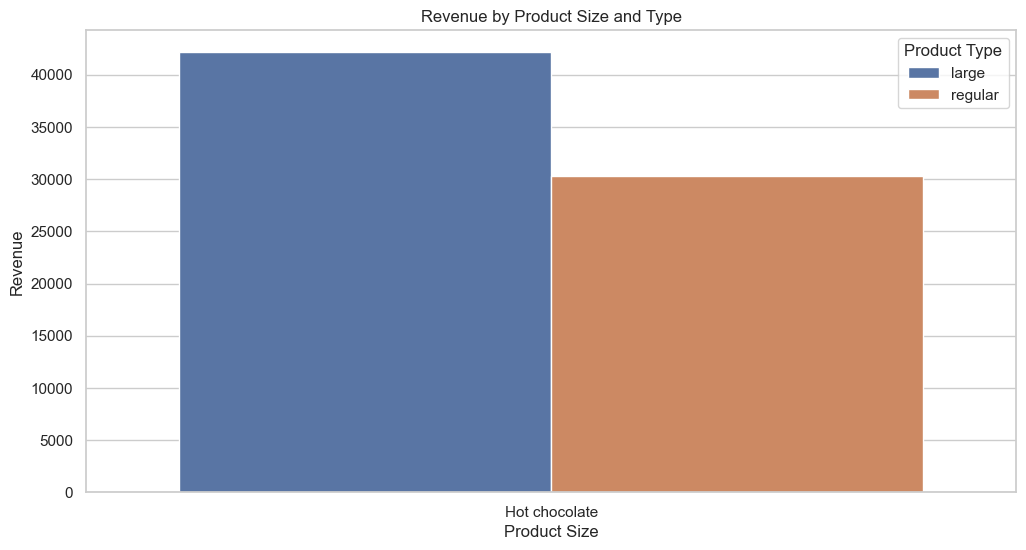

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(data=choco_size_performance, x='product_type', y='revenue', hue='product_size')
plt.title('Revenue by Product Size and Type')
plt.ylabel('Revenue')
plt.xlabel('Product Size')
plt.legend(title='Product Type')
plt.show()

#### Detailed

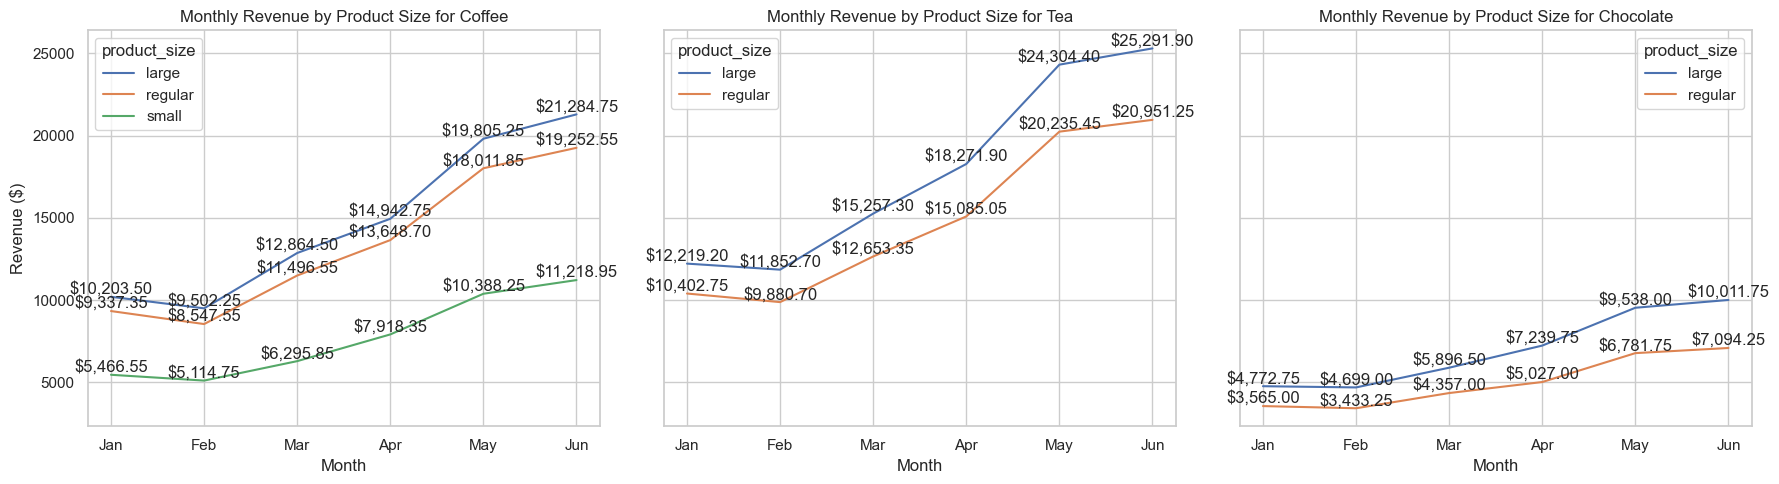

In [65]:
# Group by transaction_month, product_size, and product_category to analyze revenue
monthly_revenue = df[df['product_size'].isin(['large', 'regular', 'small']) &
                      df['product_category'].isin(['Coffee', 'Tea', 'Drinking Chocolate'])].groupby(['transaction_month', 'product_category', 'product_size']).agg({
    'revenue': 'sum'
}).reset_index()                    
                    
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot revenue for Coffee
coffee_revenue_plot = sns.lineplot(data=monthly_revenue[monthly_revenue['product_category'] == 'Coffee'],
             x='transaction_month', y='revenue', hue='product_size', markers=True, dashes=False, ax=axes[0])

# Adding data labels to Coffee Revenue plot
for line in coffee_revenue_plot.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        axes[0].text(x, y, f'${y:,.2f}', ha='center', va='bottom')

axes[0].set_title('Monthly Revenue by Product Size for Coffee')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Revenue ($)')
axes[0].set_xticks(ticks=range(1, 7))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])  # Assuming 6 months

# Plot revenue for Tea
tea_revenue_plot = sns.lineplot(data=monthly_revenue[monthly_revenue['product_category'] == 'Tea'],
             x='transaction_month', y='revenue', hue='product_size', markers=True, dashes=False, ax=axes[1])

# Adding data labels to Tea Revenue plot
for line in tea_revenue_plot.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        axes[1].text(x, y, f'${y:,.2f}', ha='center', va='bottom')

axes[1].set_title('Monthly Revenue by Product Size for Tea')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Revenue ($)')
axes[1].set_xticks(ticks=range(1, 7))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])  # Assuming 6 months

# Plot revenue for Coffee
choco_revenue_plot = sns.lineplot(data=monthly_revenue[monthly_revenue['product_category'] == 'Drinking Chocolate'],
             x='transaction_month', y='revenue', hue='product_size', markers=True, dashes=False, ax=axes[2])

# Adding data labels to Coffee Revenue plot
for line in choco_revenue_plot.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        axes[2].text(x, y, f'${y:,.2f}', ha='center', va='bottom')

axes[2].set_title('Monthly Revenue by Product Size for Chocolate')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Revenue ($)')
axes[2].set_xticks(ticks=range(1, 7))
axes[2].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])  # Assuming 6 months

# Show the plot
plt.tight_layout()
plt.show()

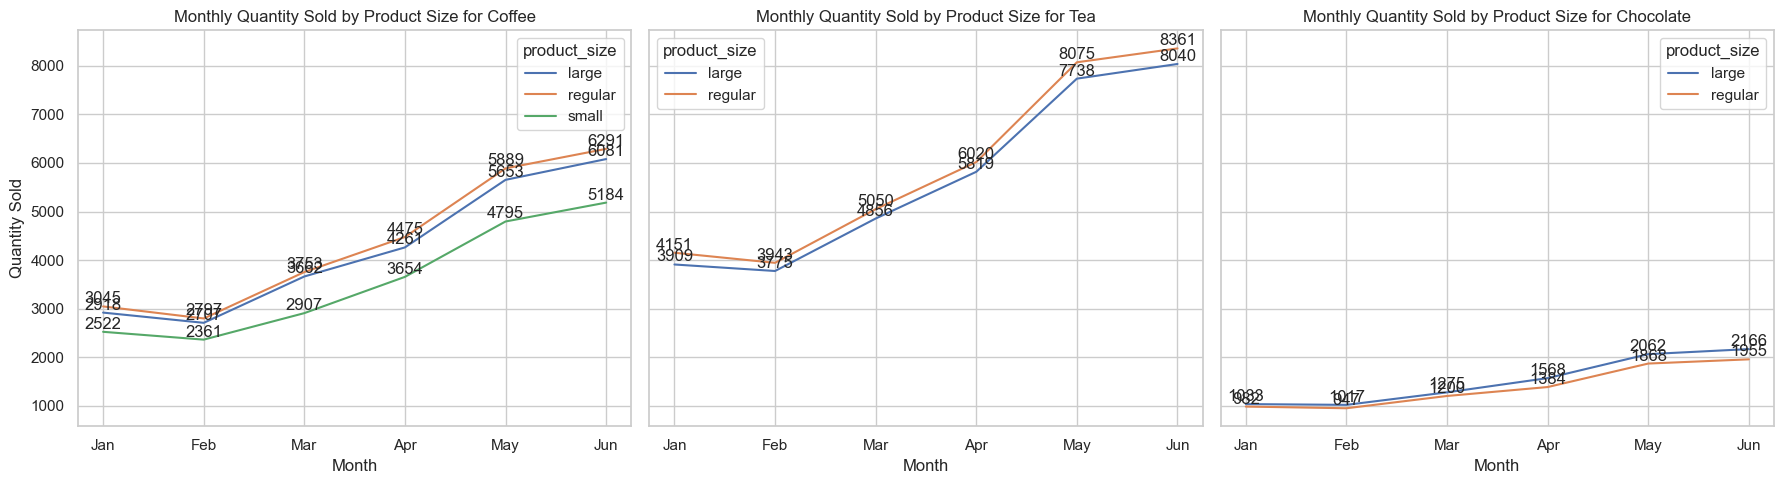

In [66]:
# Group by transaction_month, product_size, and product_category to analyze quantity sold
monthly_quantity_sold = df[df['product_size'].isin(['large', 'regular', 'small']) &
                            df['product_category'].isin(['Coffee', 'Tea', 'Drinking Chocolate'])].groupby(['transaction_month', 'product_category', 'product_size']).agg({
    'transaction_qty': 'sum'
}).reset_index()
                            
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot quantity sold for Coffee
coffee_qty_plot = sns.lineplot(data=monthly_quantity_sold[monthly_quantity_sold['product_category'] == 'Coffee'],
             x='transaction_month', y='transaction_qty', hue='product_size', markers=True, dashes=False, ax=axes[0])

# Adding data labels to Coffee Quantity Sold plot
for line in coffee_qty_plot.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        axes[0].text(x, y, int(y), ha='center', va='bottom')

axes[0].set_title('Monthly Quantity Sold by Product Size for Coffee')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Quantity Sold')
axes[0].set_xticks(ticks=range(1, 7))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])  # Assuming 6 months

# Plot quantity sold for Tea
tea_qty_plot = sns.lineplot(data=monthly_quantity_sold[monthly_quantity_sold['product_category'] == 'Tea'],
             x='transaction_month', y='transaction_qty', hue='product_size', markers=True, dashes=False, ax=axes[1])

# Adding data labels to Tea Quantity Sold plot
for line in tea_qty_plot.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        axes[1].text(x, y, int(y), ha='center', va='bottom')

axes[1].set_title('Monthly Quantity Sold by Product Size for Tea')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Quantity Sold')
axes[1].set_xticks(ticks=range(1, 7))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])  # Assuming 6 months

# Plot quantity sold for Tea
choco_qty_plot = sns.lineplot(data=monthly_quantity_sold[monthly_quantity_sold['product_category'] == 'Drinking Chocolate'],
             x='transaction_month', y='transaction_qty', hue='product_size', markers=True, dashes=False, ax=axes[2])

# Adding data labels to Tea Quantity Sold plot
for line in choco_qty_plot.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        axes[2].text(x, y, int(y), ha='center', va='bottom')

axes[2].set_title('Monthly Quantity Sold by Product Size for Chocolate')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Quantity Sold')
axes[2].set_xticks(ticks=range(1, 7))
axes[2].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])  # Assuming 6 months

# Show the plot
plt.tight_layout()
plt.show()

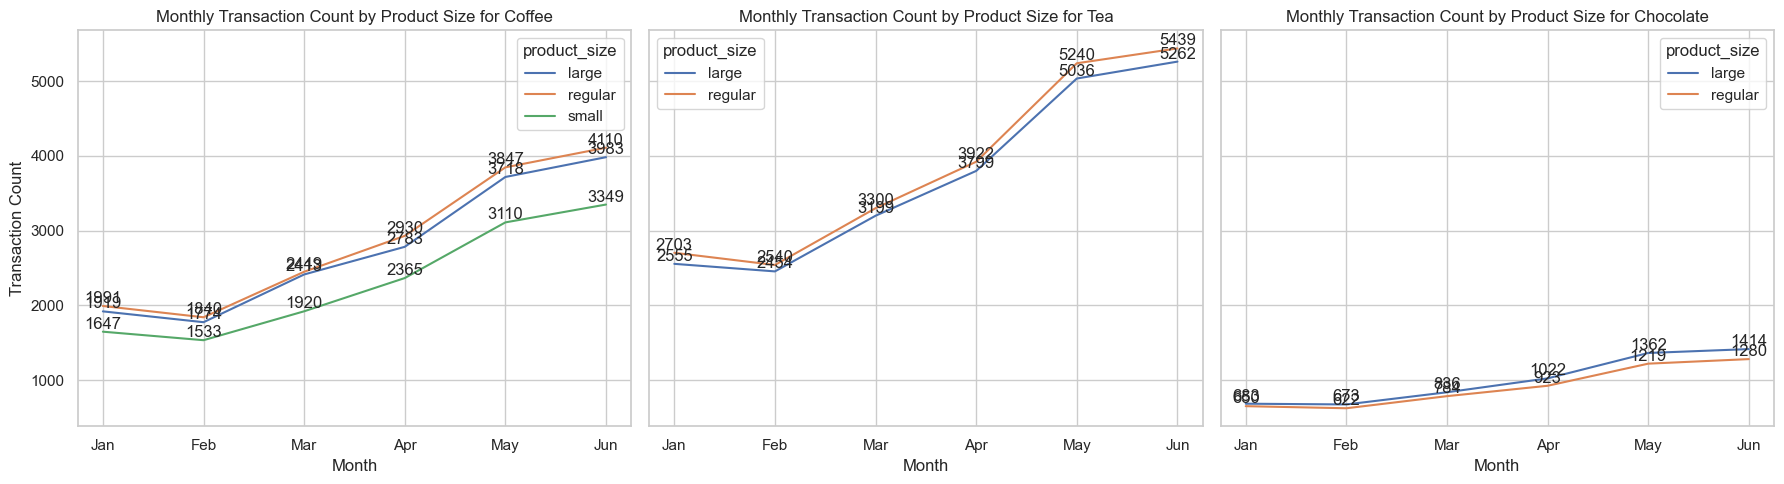

In [67]:
# Group by transaction_month, product_size, and product_category to analyze transaction count
monthly_transaction_count = df[df['product_size'].isin(['large', 'regular', 'small']) & 
                                df['product_category'].isin(['Coffee', 'Tea', 'Drinking Chocolate'])].groupby(['transaction_month', 'product_category', 'product_size']).agg({
    'transaction_id': 'count'
}).reset_index()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot transaction count for Coffee
coffee_transaction_count_plot = sns.lineplot(data=monthly_transaction_count[monthly_transaction_count['product_category'] == 'Coffee'],
             x='transaction_month', y='transaction_id', hue='product_size', markers=True, dashes=False, ax=axes[0])

# Adding data labels to Coffee plot
for line in coffee_transaction_count_plot.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        axes[0].text(x, y, int(y), ha='center', va='bottom')

axes[0].set_title('Monthly Transaction Count by Product Size for Coffee')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Transaction Count')
axes[0].set_xticks(ticks=range(1, 7))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])  # Assuming 6 months

# Plot transaction count for Tea
tea_transaction_count_plot = sns.lineplot(data=monthly_transaction_count[monthly_transaction_count['product_category'] == 'Tea'],
             x='transaction_month', y='transaction_id', hue='product_size', markers=True, dashes=False, ax=axes[1])

# Adding data labels to Tea plot
for line in tea_transaction_count_plot.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        axes[1].text(x, y, int(y), ha='center', va='bottom')

axes[1].set_title('Monthly Transaction Count by Product Size for Tea')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Transaction Count')
axes[1].set_xticks(ticks=range(1, 7))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])  # Assuming 6 months

# Plot transaction count for Tea
choco_transaction_count_plot = sns.lineplot(data=monthly_transaction_count[monthly_transaction_count['product_category'] == 'Drinking Chocolate'],
             x='transaction_month', y='transaction_id', hue='product_size', markers=True, dashes=False, ax=axes[2])

# Adding data labels to Tea plot
for line in choco_transaction_count_plot.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        axes[2].text(x, y, int(y), ha='center', va='bottom')

axes[2].set_title('Monthly Transaction Count by Product Size for Chocolate')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Transaction Count')
axes[2].set_xticks(ticks=range(1, 7))
axes[2].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])  # Assuming 6 months

# Show the plot
plt.tight_layout()
plt.show()


## Insights